# Computational Linear Algebra 1: Matrix Math, Accuracy, Memory, Speed, & Parallelization
with Rachel Thomas 

[YouTube video](https://www.youtube.com/watch?v=8iGzBMboA0I&list=PLtmWHNX-gukIc92m1K0P6bIOnZb-mg0hY&index=2&t=0s)

## Matrix-Vector Products example
Matrix multiplication with aids/hiv health numbers. This is a markov chain:

0. 85% asymptomatic 
1. 10% symptomatic
2. 5% AIDs
3. 0% death

Within 1 year what will be the % in each health state?

The stochastic matrix, a matrix of probabilties:

|0 |1 |2 |3|
|-----|-----|-----|----|
|0.90 |0.07 |0.02 |0.01|
|0 |0.93 |0.05 |0.02 |
|0 |0 |0.85 |0.15 |
|0 |0 |0 |1.00|

Each row sums to 1 since they are proabilities. The row gives you the state you are starting in and each column is the destination state you are moving to. 

In [1]:
import numpy as np

In [10]:
A = np.array([[.9, .07, .02, .01],
             [0, .93, .05, .02],
             [0, 0, .85, .15],
             [0, 0, 0, 1.00]])

x = np.array([[.85, .10, .05, 0]])

A.T @ x.T

array([[0.765 ],
       [0.1525],
       [0.0645],
       [0.018 ]])

In [17]:
print(A.T,'\n\n', x.T)

[[0.9  0.   0.   0.  ]
 [0.07 0.93 0.   0.  ]
 [0.02 0.05 0.85 0.  ]
 [0.01 0.02 0.15 1.  ]] 

 [[0.85]
 [0.1 ]
 [0.05]
 [0.  ]]


## Matrix-Matrix Product example
Person 1, 2 and 3 all shopping. Where is the best shop to pay as little as possible?

| n| roll| bun| cake| bread|
|-:|----:|---:|----:|-----:|
|p1|    6|   5|    3|     1|
|p2|    3|   6|    2|     2|
|p3|    3|   4|    3|     1|

| n| s1| s2|
|--|---|---|
|roll|1.50|1.00|
|bun|2.00|2.50|
|cake|5.00|4.50|
|bread|16.00|17.00|

In [22]:
A = np.array([[6., 5., 3., 1.],
             [3., 6., 2., 2.],
             [3., 4., 3., 1.]])

B = np.array([[1.5, 1.],
              [2., 2.5],
              [5., 4.5],
              [16., 17.]])

A @ B

array([[50. , 49. ],
       [58.5, 61. ],
       [43.5, 43.5]])

## Convolution with MNIST dataset using scipy libraries
Different edge detection filters

## Matrix Decompositions
- Topic modelling with NMF and SVD treating text as a bag of words. Words are the rows, documents are the columns
- Background removal with robust PCA and truncated SVD. 
- PageRank algorithm with Eigen vector

## Accuracy
### Floating Point Arithmetic.

Computers are finite and discrete. 

In [26]:
# This is a cycle
def f(x):
    if x <= 1/2:
        return 2*x
    if x > 1/2:
        return 2*x - 1

x = 1/10
# for i in range(80):
#     print(x)
#     x = f(x)

How computers store numbers, it's important, hence why IEEE was set up. Floats and doubles are not equidistant [What you never wanted to know about floating point but will be forced to find out](https://www.volkerschatz.com/science/float.html)

Machine epsilon: half the distace between 1 and the next larger number. This can vary by computer.

There is some really interesting history of floating points, when floats are firstly recorded by Babylonians, the selection by IEEE as the computer scientist community converged to agree on floating points, and the implementation over the 20th century. 

### Conditioning and Stability
"A stable algorithm gives nearly the right answer to nearly the right question" --Trefethen

Example with Eigenvalues.

### Approximation Accuracy
Less accuracy, increase in speed. Not always a bad thing.

Example with bloom filters. 

### Expensive Errors
Ariane 5 rocket - ESA trying to fit a 64 bit number into a 16 bit space (integer overload). 
Intel Pentium Chips error - with only 5 digits of accuracy.

## Memory Use
### Sparse vs Dense
Scipy gives you 3 different ways to store a sparse matrix, lots of zeros in a sparse matrix. 

### Speed
- computational complexity
- vectorisation: SIMD (single instruction, multiple data) - not important usually done at assembly. Numpy uses BLAS and LAPACK for low level matrix and arithmatic. 
- scaling to multiple cores and nodes
- locality - Latency with [Jeff Dean](https://gist.github.com/hellerbarde/2843375)
and this video about image processing and how to compute blue of a photo. 

Locality is really hard. Potential trade-offs:
- redundant computation to save memory bandwidth
- sacrificing parallelism to get better reuse

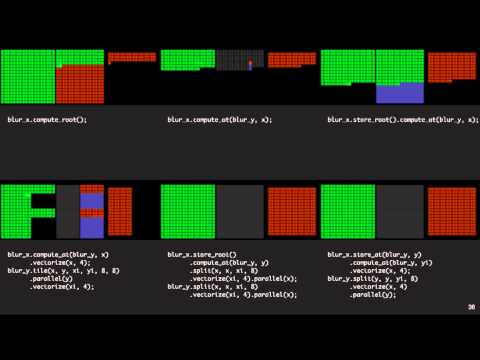

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo("3uiEyEKji0M")
# watch minutes 1-13

### Temporaries
Numpy create temporaries for every calculation done. 

## Scalability and Parallelisation
Multiple cores or nodes